# 영화리뷰 분석
---
- IMDB 데이터 활용
 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.imdb import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

## [1] 데이터 준비
---

In [2]:
# 단어사전에서 빈도가 높은 500개 까지만 사용
(X_train, y_train), (X_test, y_test) = load_data(num_words=500)

print(f'imdb 정보 \nX_train: {X_train.shape}   y_train : {y_train.shape}')
print(f'imdb 정보 \nX_test: {X_test.shape}   y_test : {y_test.shape}')

17473536/17464789 [==============================] - 0s 0us/step
imdb 정보 
X_train: (25000,)   y_train : (25000,)
imdb 정보 
X_test: (25000,)   y_test : (25000,)


In [3]:
for idx in range(3):
    print(f'{idx}번째 - label: {y_train[idx]} \n {X_train[idx]}')

0번째 - label: 1 
 [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1번째 - label: 0 
 [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110,

## [2] 학습용 데이터 변환
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조절

### [2-1] 데이터별 길이 결정

In [4]:
len_list = [len(list(i)) for i in X_train]

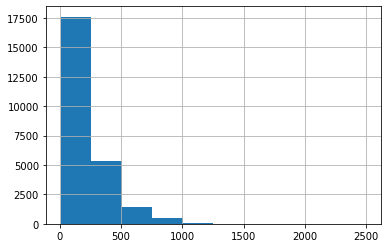

In [5]:
plt.hist(len_list)
plt.grid()
plt.show()

### [2-2] 데이터별 길이 변경

In [6]:
train_seq = pad_sequences(X_train, maxlen=100)
train_seq.shape

(25000, 100)

### [2-3] 타겟 데이터 인코딩

In [7]:
train_oh = to_categorical(train_seq)

In [8]:
print(train_oh.shape)

(25000, 100, 500)


### [2-4] 훈련/테스트 데이터 준비

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    train_oh, y_train, stratify=y_train, random_state=72
)

In [11]:
X_train.shape, y_train.shape

((18750, 100, 500), (18750,))

In [12]:
X_val.shape, y_val.shape

((6250, 100, 500), (6250,))

## [3] 모델 생성
---
- 목표: 영화리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
- 학습모델: RNN 순환신경망
- 입력: 500
- 출력: 1 => 2진분류

In [13]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, Input, Embedding

### [3-1] 모델 구성
- 입력층: 노드, 타임스탬프수, 피쳐수
- 출력층: 노드 1개 sigmoid

In [14]:
# input_shape = (X_train.shape[1], X_train.shape[2])

# model = Sequential([
#     SimpleRNN(30, input_shape=input_shape, return_sequences=True),
#     SimpleRNN(30),
#     Dense(1, activation='sigmoid')
# ])

In [15]:
# model.summary()

### [3-2] 모델 생성

In [16]:
# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

### [3-3] 학습

In [17]:
# his = model.fit(
#     X_train,
#     y_train,
#     validation_data=(X_val, y_val),
#     epochs=15
# )

## [4] Embedding RNN Model
---
- OHE 입력 데이터의 많은 메모리 소모에 대한 문제 해결
- 토큰을 밀집형태의 벡터로 변경
- Embedding Layer 적용
    * 입력: 토큰의 크기 즉 단어사전의 크기
    * 출력: 줄여서 생성하는 벡터 크기
    * 입력층일경우 => input_dim 타임스탬프 즉 하나의 문장을 구성하는 토큰 수

### [4-1] 모델 구성

In [28]:
model=Sequential()
# One-Hot-Encoding 500의 거대한 데이터 => 밀집형태 20크기 벡터로 변환
model.add(Input((100,500)))
model.add(Embedding(input_dim=500, output_dim=20, input_length=100))
model.add(SimpleRNN(10))
model.add(Dense(1, activation='sigmoid'))

model.summary()

ValueError: ignored

### [4-2] 모델 생성

In [25]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

### [4-3] 학습

In [26]:
history=model.fit(X_train, y_train, epochs=10)

Epoch 1/10


ValueError: ignored